In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('reddit_pushshift_dropped_irrelevant.csv')

In [3]:
df

,movie_name,genre,original_language,popularity,release_date,vote_average,vote_count,revenue,runtime,author,score,link_id,body,utc_datetime_str,"subjectivity \n{0: neutral,1\n: subjective}","polarity \n{0: negative, \n1: positive, \n2: neutral}",to remove useless comment \n(0: useful \n1: useless)
0,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,Whale31777,1.0,t3_10z5t71,Im just happy to see you Avatar 2.,11/2/2023 6:01,1.0,1.0,0.0
1,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,njdevils901,1.0,t3_10za4qa,holy shit someone on /r/movies understands why...,11/2/2023 4:17,1.0,1.0,0.0
2,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,Icy-Exchange6457,1.0,t3_10z2ctw,Avatar 2. Absolutely loved the first one and I...,11/2/2023 3:05,1.0,0.0,0.0
3,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,FortitudeWisdom,1.0,t3_10z61yi,"This movie did surprised me. A good film, but ...",11/2/2023 0:27,1.0,1.0,0.0
4,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,yousyveshughs,1.0,t3_10yfvyj,The Batman kinda sucked though. It was boring ...,10/2/2023 20:05,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28459,A Madea Family Funeral,Comedy,en,13.689,3/1/2019,5.9,435.0,46115383.0,104.0,Wehavecrashed,1.0,t3_ay9785,You could just not be informed. It is just a m...,14/3/2019 5:44,NaN,NaN,NaN
28460,A Madea Family Funeral,Comedy,en,13.689,3/1/2019,5.9,435.0,46115383.0,104.0,haunthorror,21.0,t3_ae0vih,There is possibly going to be 4 straight weeks...,9/1/2019 1:21,NaN,NaN,NaN
28461,A Madea Family Funeral,Comedy,en,13.689,3/1/2019,5.9,435.0,46115383.0,104.0,JustOneSexQuestion,24.0,t3_9y1p99,You made me check. A Madea Family Funeral rele...,18/11/2018 3:31,NaN,NaN,NaN
28462,A Madea Family Funeral,Comedy,en,13.689,3/1/2019,5.9,435.0,46115383.0,104.0,aquamarinerock,1.0,t3_9ssids,"The next, and apparently last, Madea movie is ...",31/10/2018 5:20,NaN,NaN,NaN


In [4]:
df.isnull().sum()

movie_name                                                   4
genre                                                        5
original_language                                            5
popularity                                                   5
release_date                                                 5
vote_average                                                 5
vote_count                                                   5
revenue                                                      5
runtime                                                      5
author                                                     203
score                                                      203
link_id                                                    203
body                                                         5
utc_datetime_str                                           203
subjectivity \n{0: neutral,1\n: subjective}              23805
polarity \n{0: negative, \n1: positive, \n2: neutral}  

In [5]:
df = df.dropna().reset_index(drop=True)
df

,movie_name,genre,original_language,popularity,release_date,vote_average,vote_count,revenue,runtime,author,score,link_id,body,utc_datetime_str,"subjectivity \n{0: neutral,1\n: subjective}","polarity \n{0: negative, \n1: positive, \n2: neutral}",to remove useless comment \n(0: useful \n1: useless)
0,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,Whale31777,1.0,t3_10z5t71,Im just happy to see you Avatar 2.,11/2/2023 6:01,1.0,1.0,0.0
1,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,njdevils901,1.0,t3_10za4qa,holy shit someone on /r/movies understands why...,11/2/2023 4:17,1.0,1.0,0.0
2,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,Icy-Exchange6457,1.0,t3_10z2ctw,Avatar 2. Absolutely loved the first one and I...,11/2/2023 3:05,1.0,0.0,0.0
3,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,FortitudeWisdom,1.0,t3_10z61yi,"This movie did surprised me. A good film, but ...",11/2/2023 0:27,1.0,1.0,0.0
4,Avatar 2,"Action, Adventure, Science Fiction, Fantasy",en,58.466,14/12/2022,0.0,0.0,0.0,0.0,yousyveshughs,1.0,t3_10yfvyj,The Batman kinda sucked though. It was boring ...,10/2/2023 20:05,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,The Invisible Man,"Thriller, Science Fiction, Horror",en,29.875,2/26/2020,7.2,4135.0,130234661.0,124.0,HerpankerTheHardman,1.0,t3_zgvs75,The last film I saw in the theaters where it w...,9/12/2022 17:34,1.0,1.0,0.0
3947,Red Son,"Science Fiction, Animation, Action",en,20.874,2/24/2020,7.3,614.0,0.0,84.0,debtRiot,1.0,t3_10q48lk,Red Son is such an amazing concept but such a ...,1/2/2023 5:51,1.0,1.0,0.0
3948,Red Son,"Science Fiction, Animation, Action",en,20.874,2/24/2020,7.3,614.0,0.0,84.0,nerds-and-birds,1.0,t3_10q48lk,Red Son would be amazing. I love that story. H...,1/2/2023 1:03,1.0,2.0,0.0
3949,Red Son,"Science Fiction, Animation, Action",en,20.874,2/24/2020,7.3,614.0,0.0,84.0,the_421_Rob,1.0,t3_ywdbag,I love the what if stuff Im not a big Superman...,16/11/2022 0:40,1.0,1.0,0.0


In [6]:
df['subjectivity \n{0: neutral,1\n: subjective}'].unique()

array([1., 0.])

In [7]:
df['subjectivity \n{0: neutral,1\n: subjective}'].value_counts()

1.0    3780
0.0     171
Name: subjectivity \n{0: neutral,1\n: subjective}, dtype: int64

In [8]:
df['polarity \n{0: negative, \n1: positive, \n2: neutral}'].unique()

array([1., 0., 2.])

In [9]:
df['polarity \n{0: negative, \n1: positive, \n2: neutral}'].value_counts()

1.0    2117
0.0    1274
2.0     560
Name: polarity \n{0: negative, \n1: positive, \n2: neutral}, dtype: int64

Text(0.5, 1.0, 'Polarity')

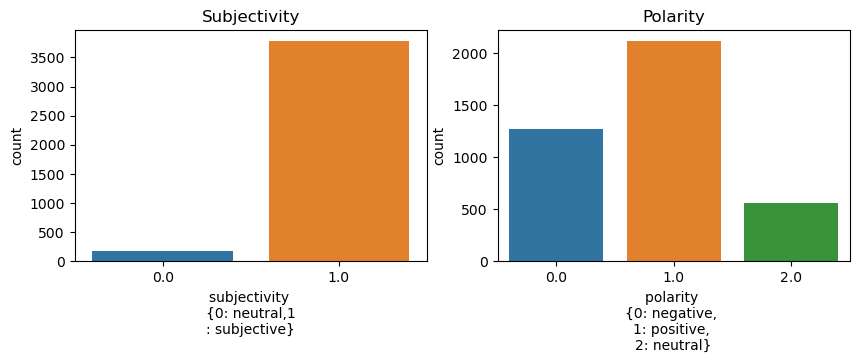

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x='subjectivity \n{0: neutral,1\n: subjective}', data=df, ax=axs[0])
sns.countplot(x='polarity \n{0: negative, \n1: positive, \n2: neutral}', data=df, ax=axs[1])

axs[0].set_title('Subjectivity')
axs[1].set_title('Polarity')

In [11]:
X = df['body']
y = df['polarity \n{0: negative, \n1: positive, \n2: neutral}']

# Data Processing

In [12]:
ps = PorterStemmer()
corpus = []

for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Applying Tf-idf to convert data into vectors

In [18]:
cv = TfidfVectorizer(max_features = len(X))
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(3951, 3951)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Define Naive Bayes model

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [22]:
pred = mnb.predict(X_test)

In [23]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6776232616940582
[[135 122   0]
 [ 24 400   0]
 [ 24  85   1]]
              precision    recall  f1-score   support

         0.0       0.74      0.53      0.61       257
         1.0       0.66      0.94      0.78       424
         2.0       1.00      0.01      0.02       110

    accuracy                           0.68       791
   macro avg       0.80      0.49      0.47       791
weighted avg       0.73      0.68      0.62       791



In [25]:
pd.DataFrame(np.c_[y_test, pred], columns=['original', 'predicted'])

,original,predicted
0,0.0,0.0
1,0.0,1.0
2,2.0,1.0
3,2.0,1.0
4,0.0,0.0
...,...,...
786,2.0,1.0
787,0.0,0.0
788,0.0,1.0
789,0.0,1.0


# Saving and loading of model and Tf-idf vectorizer

In [26]:
pickle.dump(cv, open('count-Vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('classification.pkl', 'wb'))

In [27]:
save_cv = pickle.load(open('count-Vectorizer.pkl', 'rb'))
model = pickle.load(open('classification.pkl', 'rb'))

# Model testing

In [28]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 0:
        return 'negative'
    elif res == 1:
        return 'positive'
    elif res == 2:
        return 'neutral'

In [31]:
sen = df['body'][10]
print(sen)

Absolutely. This and Avatar 2 are so refreshing because they don't try and be clever by inserting obscure references or have corny self depreciating jokes from the characters. Both were sincere movies with huge spectacle that you can't experience in anything less than a big screen.


In [32]:
res = test_model(sen)
print(res)

positive
